In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv('ChurnData.csv')
df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


In [3]:
x = df.drop(columns = 'churn')
y = df['churn']

In [4]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2)

In [5]:
lr = LogisticRegression(C = 0.01, solver = 'liblinear')
lr.fit(xtrain, ytrain)

LogisticRegression(C=0.01, solver='liblinear')

In [6]:
prediction = lr.predict(xtest)
prob = lr.predict_proba(xtest)
print(prediction, " ", prob)

[0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0.
 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0.]   [[0.88764273 0.11235727]
 [0.80725488 0.19274512]
 [0.31333903 0.68666097]
 [0.99200978 0.00799022]
 [0.85207644 0.14792356]
 [0.78372694 0.21627306]
 [0.69490583 0.30509417]
 [0.56587207 0.43412793]
 [0.6785445  0.3214555 ]
 [0.44448249 0.55551751]
 [0.97320756 0.02679244]
 [0.95262904 0.04737096]
 [0.71020255 0.28979745]
 [0.72476712 0.27523288]
 [0.30400378 0.69599622]
 [0.54326595 0.45673405]
 [0.52375816 0.47624184]
 [0.7206167  0.2793833 ]
 [0.96491104 0.03508896]
 [0.45582066 0.54417934]
 [0.5506546  0.4493454 ]
 [0.43926898 0.56073102]
 [0.70040367 0.29959633]
 [0.78554867 0.21445133]
 [0.36208325 0.63791675]
 [0.48951978 0.51048022]
 [0.91771931 0.08228069]
 [0.94846869 0.05153131]
 [0.3842071  0.6157929 ]
 [0.72384989 0.27615011]
 [0.87514307 0.12485693]
 [0.69183364 0.30816636]
 [0.69220803 0.30779197]
 [0.25977306 0.74022694]
 [0.44859227 0.55140773]


In [7]:
from sklearn.metrics import jaccard_score
jaccard_score(ytest, prediction, pos_label = 0)

0.5882352941176471

In [8]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(ytest, prediction, labels=[1,0]))

[[ 6  9]
 [ 5 20]]


Confusion matrix, without normalization
[[ 6  9]
 [ 5 20]]


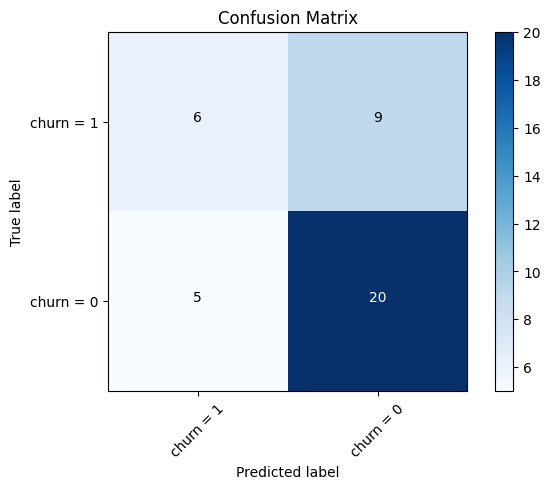

In [9]:
cnfMatrix = confusion_matrix(ytest, prediction, labels = [1, 0])
np.set_printoptions(precision = 2)
plt.figure()
plot_confusion_matrix(cnfMatrix, classes = ['churn = 1', 'churn = 0'], normalize = False, title = 'Confusion Matrix')

In [10]:
print(classification_report(ytest, prediction))


              precision    recall  f1-score   support

         0.0       0.69      0.80      0.74        25
         1.0       0.55      0.40      0.46        15

    accuracy                           0.65        40
   macro avg       0.62      0.60      0.60        40
weighted avg       0.64      0.65      0.64        40



In [11]:
from sklearn.metrics import log_loss
log_loss(ytest, prob)

0.7278743678841811